<a href="https://colab.research.google.com/github/Aikhusy/PCVK/blob/master/UAS%20PROGRESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def readImage (paths):
    images=[]

    for path in paths:
        image= cv2.imread(path,0)
        if image is not None:
            images.append(image)
        else:
            print(f"Failed to read image at path: {path}")

    return images

In [ ]:
def pathProcessing (path):
    image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.gif']  # Add more extensions if needed
    image_paths = []

    for ext in image_extensions:
        image_paths.extend(glob.glob(os.path.join(path, ext)))

    return image_paths

In [ ]:
def gaussianBlur(images):
    blurredImages=[]
    for image in images:
        kernel_size = (5, 5)
        sigma_x = 1
        blurredImage = cv2.GaussianBlur(image, kernel_size, sigma_x)
        blurredImages.append(blurredImage)

    return blurredImages

In [ ]:
def kmeansWithCV2(images):
    kmeansed = []

    for image in images:
        # Flatten the pixels of each image
        pixels = image.reshape((-1, 3)).astype(np.float32)

        # Use KMeans from OpenCV
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
        k = 3
        _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

        # Assign the cluster center to each pixel
        segmented_image = centers[labels.flatten()].reshape(image.shape)

        kmeansed.append(segmented_image)

    return kmeansed


In [ ]:
def sharpeningFilter(images):
    sharpenedImages = []
    for image in images:
        # Create a Laplacian kernel for sharpening
        kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]], dtype=np.float32)

        # Apply the filter to the image
        sharpenedImage = cv2.filter2D(image, -1, kernel)

        sharpenedImages.append(sharpenedImage)

    return sharpenedImages

In [ ]:
def show_images(images, num_cols=3):
    num_images = len(images)
    num_rows = (num_images + num_cols - 1) // num_cols

    plt.figure(figsize=(10, 8))  # Atur ukuran figur sesuai kebutuhan

    for i, image in enumerate(images, 1):
        plt.subplot(num_rows, num_cols, i)
        plt.imshow(image, cmap='gray')  # Menggunakan cmap='gray' jika gambar dalam mode grayscale
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
def dilation(images):
    sharpenedImages = []
    kernel = np.ones((5,5))
    for image in images:


      dilate = cv2.dilate(image, kernel, 2)

      sharpenedImages.append(dilate)
    return sharpenedImages

In [ ]:
def cannyEdge(images):
    sharpenedImages = []
    for image in images:


      edged = cv2.Canny(image, 30, 50)

      sharpenedImages.append(edged)
    return sharpenedImages

In [ ]:
def contour(pureImages,processedImages):

    contouredImages = []
    number=0
    for image in processedImages:
        contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

        cv2.drawContours(pureImages[number], contours, -1, (0,0,255), 3)
        number+=1




In [ ]:
def histogramEqualizing(images):
    equalizedImages=[]
    for image in images:
        equalizedImage = cv2.equalizeHist(image)
        equalizedImages.append(equalizedImage)

    return equalizedImages

In [ ]:
def adaptiveThresholding(images):
  thresholded=[]
  for image in images:
    normalizedImage = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    adaptiveThreshold = cv2.adaptiveThreshold(normalizedImage, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    thresholded.append(adaptiveThreshold)
  return thresholded

In [ ]:
def laplacianEdgeDetect(images):
    edgeDetected=[]
    for image in images :
        laplacian = cv2.Laplacian(image, cv2.CV_64F)
        edgeDetected.append(laplacian)

    return edgeDetected

In [ ]:
def otsuThresholding(images):
    thresholded=[]
    for image in images:
        normalizedImage = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
        ret, otsu_threshold = cv2.threshold(normalizedImage, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        thresholded.append(otsu_threshold)
    return thresholded

In [ ]:
def main():
  folderPath= '/content/drive/MyDrive/Kelompok 1'
  paths=pathProcessing(folderPath)
  pureImages=readImage(paths)
  images= readImage(paths)
  blurred= gaussianBlur(images)
  blurred= gaussianBlur(blurred)
  blurred= gaussianBlur(blurred)
  canny=cannyEdge(blurred)
  dilate=dilation(canny)
  contour(pureImages,dilate)

  show=show_images(pureImages)




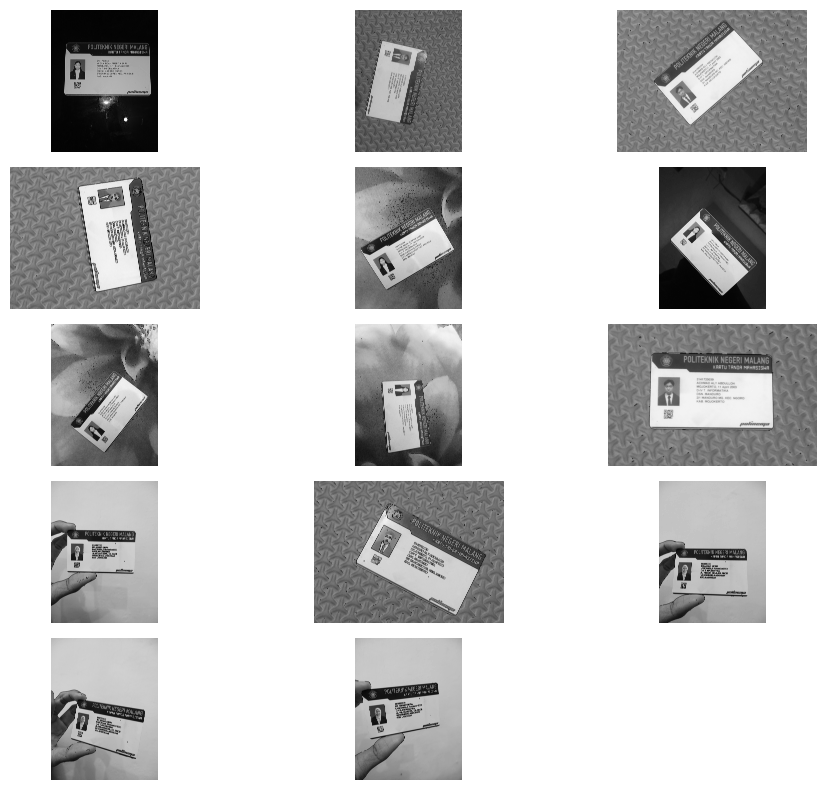

In [ ]:
main()